#### Question 1:

in this question I used MSE error function and GD algorithm to solve a linear regresion problem.

in first part by using csv library I simply open and read data of the file and store them in variables. the data we need in this question is the price of the house and the sqft_living. I stored them in variables theList_y and theList_x and we want to find a line that describes the relationship between the price and sqft_living as good as possible, using linear regretion.
we consider the equation of this line as:
teta0+(teta1*x)=y
so actually what we need to do is finding best values for teta0 and teta1.

the method I used for initializing them is to assign a random number between 0 and 1 to each of them. in next parts we will use other methods too.

we also have to set a learning rate (alpha parameter), after some testing, I found out 5e-10 is a good rate.

the m variable is saving the count of our training data.

In [1]:
import csv
import random
teta0=random.random()
teta1=random.random()
temp0=temp1=0
alpha=5e-10
theList_x=[]
theList_y=[]

with open('kc_house_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            theList_y.append(float(row[2]))
            theList_x.append(float(row[5]))
            line_count += 1
            
    print(line_count)
m=len(theList_x)


21614


the h function :
this is the function that calculates the value of the linear model for each training data. then in other functions we will use this value to calcute error and try to minimize error by setting teta values.

In [2]:
def h_function(xi):
    return teta0+teta1*xi

this function calculates : dj(teta)/dtata0 

this is going to be used for updating teta0

In [3]:
def teta0_derivation():
    sigma0=0
    for i in range(m):
        sigma0+=(h_function(theList_x[i])-theList_y[i])
    return sigma0

this function calculates : dj(teta)/dtata1 

this is going to be used for updating teta1

In [4]:
def teta1_derivation():
    sigma1=0
    for i in range(m):
        sigma1+=((h_function(theList_x[i])-theList_y[i])*theList_x[i])
    return sigma1

thi is my update function, it updates teta0 and teta1 using derivations that where calculated above. the general formula for updationg teta is:
tata=teta-alpha*(1/m)*dj(teta)/dteta that for our problem, j(teta) is MSE function that calculates the error of the price that our h_function predicted.

In [5]:
def update(mode):
    if(mode==0):
        return teta0-(alpha*(1.0/m)*teta0_derivation())
    else :
        return teta1-(alpha*(1.0/m)*teta1_derivation())

    

in bellow, we perform GD algorithm with 5000 iterations.
it means that it calls update function and update teta valaues until an accaptable convergence so that our linear model can predict the price based on sqft_living, as best as it can.

In [6]:
for j in range(5000):
    temp0=update(0)
    temp1=update(1)
    teta0=temp0
    teta1=temp1
    
print(teta0)
print(teta1)
    


0.142255239101
263.088501856


as you can see, the teta values are calculated and now we drow the graph of training data and our linear model to see how good it could perform! 


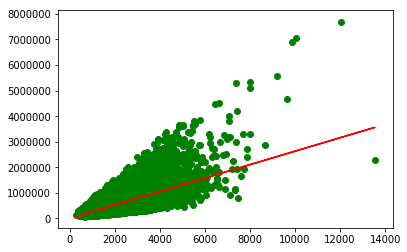

In [12]:
import matplotlib.pyplot as plt
import numpy as np  
axes = plt.gca()
x_vals = np.array(theList_x)
y_vals = teta0 + teta1 * x_vals
plt.plot(x_vals, y_vals,color='red')
plt.scatter(theList_x,theList_y,color='green')

plt.show()

we saw the performance of our algorithm with random initialization in above parts.
now let's test a new form of initializaton. we set every teta with the same value 0 to see if it has better or worse effect on our algorithm.

In [13]:
teta0=0
teta1=0
temp0=temp1=0

In [14]:
for j in range(5000):
    temp0=update(0)
    temp1=update(1)
    teta0=temp0
    teta1=temp1
    
print(teta0)
print(teta1)

-0.0719229815861
263.089217822


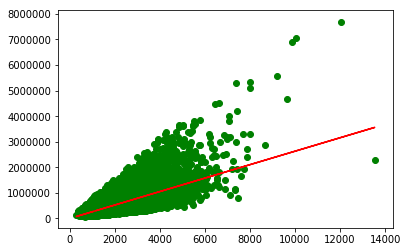

In [16]:
import matplotlib.pyplot as plt
import numpy as np  
axes = plt.gca()
x_vals = np.array(theList_x)
y_vals = teta0 + teta1 * x_vals
plt.plot(x_vals, y_vals,color='red')
plt.scatter(theList_x,theList_y,color='green')

plt.show()

in our case we can we can't see much diffrence between these two methods(only a little diffrence in final callculated values) of initialization becase our model is not very complex and it only has two features but in general if we set all of our teta parameters to zero,it is a very bad method! specially in large and complex models, becuse it cuses the data to update very very slowly and in a very large number of first itteration the state of model won't change very much.

in conclusion we can say that the best and mostly used method to initialize is random initialization.